# Convolutional Neural Network using MNIST data set

The MNIST Dataset consist of 70,0000 images of hand written digits. The database contains 60,000 training images and 10,000 for testing the learning model. When using a Convolutional Neural Network we can relate pixels that are next to eachother by filtering out the image with a smaller pixel filter to decrease the size. This is done without loosing the relationship between pixels.

|![MNIST Dataset](img/MnistExamples.png) |
|:--:| 
|*MNIST Dataset Image*|

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Running the MNIST data set using Tenserflow's Keras API and seperating the training images and the testing images. x_train and x_test contains RGB codes from 0 to 255 while y_train and y_test contains labels from 0 to 9

|![title](img/1-16.png)|
|:--:| 
|*Training and Testing in a Dataset*|

In [32]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

2


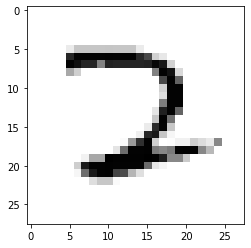

In [33]:
image_index = 530
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [34]:
#Showing the number of images and pixel size of the image for verification

x_train.shape

(60000, 28, 28)

In [35]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


|![MNIST Dataset](img/img2.jpeg) |
|:--:| 
|*Example of a CNN sequence to classify neural networks*|


We have reshaped the dataset by using a 4-dims numpy array. When working with neural network models we must normalize the data. By dividing the RGB codes to 255 we can achive normalization. In the following code we start building the Convolutional Neural Network by using Sequential mode from the keras package. With the model we will use
    - Conv2D
    - MaxPooling2D
    - Flatten
    - Dense
    - Dropout
    
By using Conv2D we take out original image (5,5) and filtering it with MaxPooling2D to a smaller pixel (3,3). Dropout layer determines the overfitting while Flatten is used to change a 2D array to a 1D. The dense layer located in the last line the cell must maintain 10 neurons at all times since there is only number from 0-9. By experimenting with kernel size, pool size, dropout rate the number of neurons in the first dense layer we can gain better results

In [36]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(150, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(10,activation=tf.nn.softmax))

In [37]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.1752 - accuracy: 0.9479
Epoch 2/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.0651 - accuracy: 0.9804
Epoch 3/10
60000/60000 [==============================] - 11s 175us/step - loss: 0.0475 - accuracy: 0.9854
Epoch 4/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0381 - accuracy: 0.9877
Epoch 5/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.0329 - accuracy: 0.9897
Epoch 6/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.0293 - accuracy: 0.9903
Epoch 7/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.0252 - accuracy: 0.9916
Epoch 8/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.0225 - accuracy: 0.9925
Epoch 9/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.0242 - accuracy: 0.9921
Epoch 10/10
60000/60000 [============

In [38]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 35us/step


[0.04006478458622823, 0.9887999892234802]

### Our model achieved 98.87% acccuracy and our model is able to clasify the handwritten 7 as a 7.

7


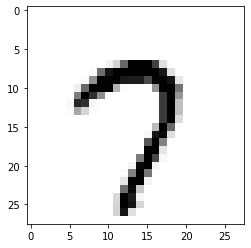

In [40]:
image_index = 438
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

### References
#### 1. https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53